# Exploratory Analysis of Spotify Audio Features and Track Popularity
**Tools:** Python (pandas, matplotlib), SQL (SQLite)

## Project Objective
The goal of this project is to explore how different audio features of songs
(e.g., energy, danceability, valence, tempo) relate to track popularity on Spotify.
Using exploratory data analysis, SQL-based aggregation, and data visualization,
this analysis aims to uncover patterns that can inform music recommendation and
content strategy decisions.


## Dataset Overview
This dataset contains audio features and popularity metrics for tracks available
on Spotify. Key variables include:
- Popularity score (0–100)
- Audio features such as energy, danceability, valence, tempo, and loudness
- Track-level metadata

The dataset will be used for exploratory analysis and insight generation.


In [1]:
import os
os.getcwd()
os.listdir("..")  # lists everything in the folder above 'notebooks'
os.listdir("../data/raw")




['spotify_tracks.csv']

## 1. Data Loading & Overview

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("../data/raw/spotify_tracks.csv")

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## Data Cleaning
Basic data cleaning was performed to ensure consistency and remove incomplete records.

In [5]:
df = df.dropna(subset=["popularity", "energy", "danceability", "valence"])


## 3. Exploratory Analysis (EDA)!!

In [6]:
import sqlite3

conn = sqlite3.connect(":memory:")
df.to_sql("tracks", conn, index=False, if_exists="replace")


114000

## Analysis 1: Energy vs Popularity
This analysis explores whether higher-energy tracks tend to have higher average popularity.


In [7]:
query = """
SELECT
  ROUND(energy, 2) AS energy_level,
  AVG(popularity) AS avg_popularity,
  COUNT(*) AS track_count
FROM tracks
GROUP BY energy_level
HAVING track_count > 50
ORDER BY energy_level;
"""

energy_popularity = pd.read_sql(query, conn)
energy_popularity.head()


,energy_level,avg_popularity,track_count
0,0.00,36.533808,281
1,0.01,33.810959,365
2,0.02,34.064286,280
3,0.03,31.623978,367
4,0.04,29.762195,328


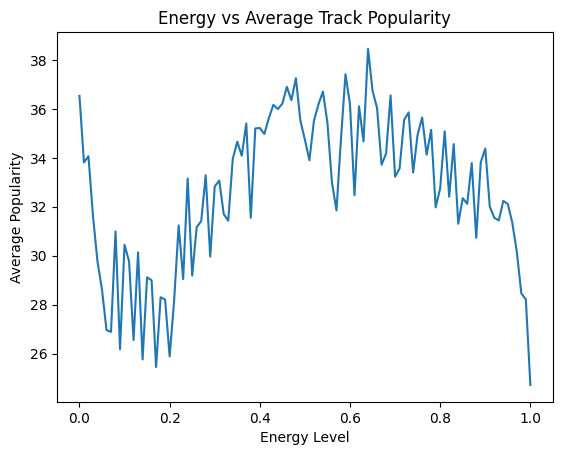

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(
    energy_popularity["energy_level"],
    energy_popularity["avg_popularity"]
)
plt.xlabel("Energy Level")
plt.ylabel("Average Popularity")
plt.title("Energy vs Average Track Popularity")
plt.show()


### Insight
Tracks with moderate to high energy levels tend to show higher average popularity.
This suggests that listeners may prefer songs that feel engaging or dynamic,
which has implications for playlist curation and recommendation systems.


## Analysis 2: Danceability vs Popularity
This analysis explores whether high-danceability tracks tend to have higher average popularity.

In [9]:
query = """
SELECT
  ROUND(danceability, 2) AS dance_level,
  AVG(popularity) AS avg_popularity,
  COUNT(*) AS track_count
FROM tracks
GROUP BY dance_level
HAVING track_count > 50
ORDER BY dance_level;
"""




In [10]:
dance_popularity = pd.read_sql(query, conn)
dance_popularity.head()

,dance_level,avg_popularity,track_count
0,0.00,37.197452,157
1,0.06,24.067416,89
2,0.07,26.600000,105
3,0.08,25.870370,108
4,0.09,21.462121,132


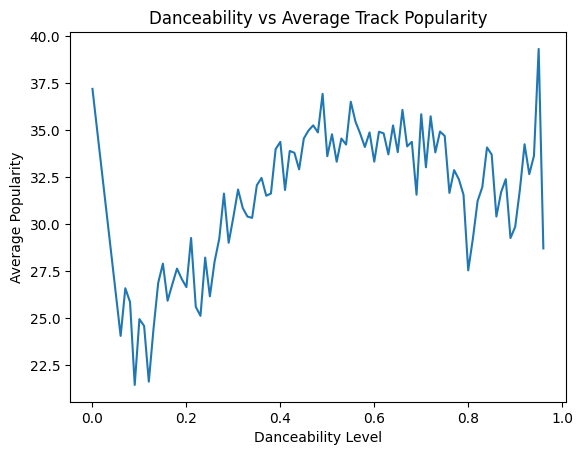

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(
    dance_popularity["dance_level"],
    dance_popularity["avg_popularity"]
)
plt.xlabel("Danceability Level")
plt.ylabel("Average Popularity")
plt.title("Danceability vs Average Track Popularity")
plt.show()


### Insight
Tracks with moderate to high danceability levels tend to show higher average popularity.
This suggests that listeners may prefer songs that feel energetic or have more rhythym,
which has implications for playlist curation and recommendation systems.

## Conclusion & Next Steps
This analysis highlights how audio features can influence track popularity on Spotify.
While the findings are exploratory, they suggest opportunities for improving music
recommendation systems and playlist curation.

Future work could incorporate user-level listening behavior or temporal trends to
better understand causal relationships.
